# Simple Lane Detection Pipeline
## Processing still images

### Import packages

In [1]:
import os
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from draw_lines import DrawLines

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Setup

In [2]:
draw_lines = DrawLines()

def visualise(images, titles=None, nrows=1, ncols=1):
    if titles == None:
        titles=[len(images)*['',]][0]
    imshape = images[0].shape
    height = (imshape[0]/nrows)*0.05
    width = (imshape[1]/ncols)*0.02
    f, axarr = plt.subplots(nrows, ncols, figsize=(height, width))
    if (nrows == ncols == 1):
        axarr.imshow(images[0], cmap='gray')
        axarr.set_title(titles[0])
    else:
        for i in range(0, nrows):
            for j in range(0, ncols):
                idx = i*ncols + j
                try:
                    axarr[i, j].imshow(images[idx], cmap='gray')
                    axarr[i, j].set_title(titles[idx])
                except IndexError:
                    if nrows > ncols:
                        axarr[i].imshow(images[idx], cmap='gray')
                        axarr[i].set_title(titles[idx])
                    else:
                        axarr[j].imshow(images[idx], cmap='gray')
                        axarr[j].set_title(titles[idx])
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()

### Test images

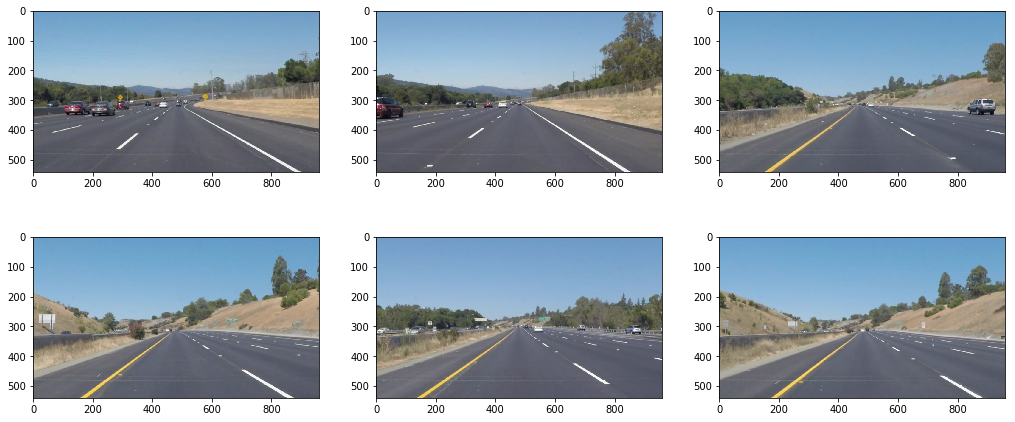

In [3]:
# read in input images
image_list = os.listdir("test_images/")
images = []
for image in image_list:
    images.append(mpimg.imread('test_images/'+image))
visualise(images, nrows=2, ncols=3)

### Image pipeline

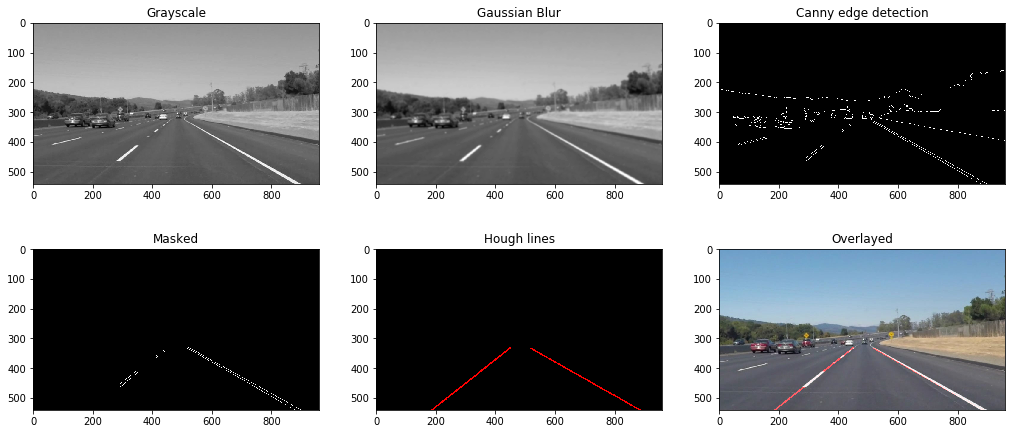

In [4]:
# choose a test image
image = images[0]

vertices = np.array([[(0, image.shape[0]),
                      (450, 325),
                      (520, 325),
                      (image.shape[1], image.shape[0])]],
                    dtype=np.int32)

image_gra = draw_lines.grayscale(image)
image_gau = draw_lines.gaussian_blur(image_gra, 11)
image_can = draw_lines.canny(image_gau, 40, 40*3)
image_rio = draw_lines.region_of_interest(image_can, vertices)
lines = draw_lines.hough_lines(image_rio, 1, np.pi/180, 15, 5, 5)
image_zer = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
image_lin = draw_lines.draw_lines(image_zer, lines)
image_wei = draw_lines.weighted_image(image_lin, image)

visualise(images=[image_gra,image_gau,image_can,image_rio,image_lin,image_wei],
          titles=['Grayscale','Gaussian Blur','Canny edge detection','Masked','Hough lines','Overlayed'],
          nrows=2, ncols=3)

### Processing images

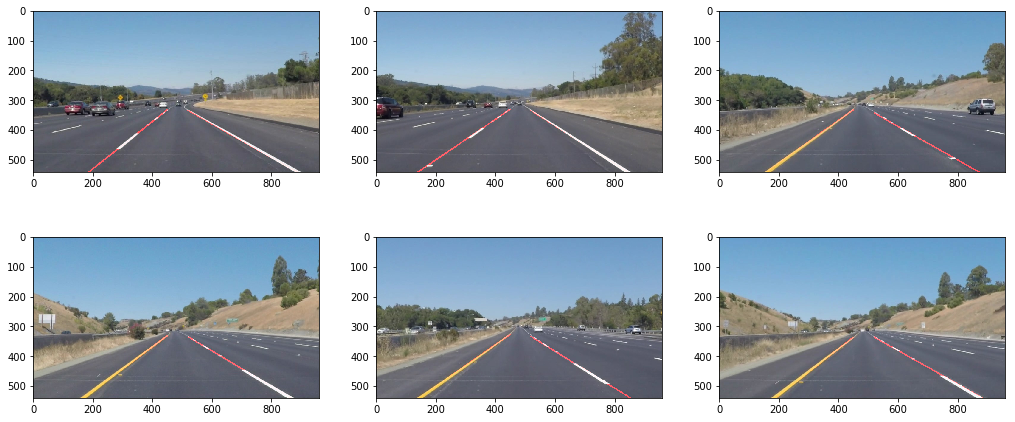

In [5]:
processed_images=[]
for image in images:
    processed_images.append(draw_lines(image))
visualise(processed_images, nrows=2, ncols=3)

---